## Segment Analysis of clients using Credit Card Data
Suppose that a credit card company wants to define a marketing strategy to increase their operational income. The company has a dataset of 8950 credit holders with 16 behavioral variables during the last 6 months. 

So, the main objective in this process will be to separate customers by groups that have similar behaviors and analyze them considering the risk of default of the credit card bill.

## 1- Loading pandas and the Dataset

In [1]:
import pandas as pd
dataframe= pd.read_csv('CC GENERAL.csv')
dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace=True)
dataframe.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

## 2 - Preprocessing
#### I) Check if there are missing values:

In [2]:
missing= dataframe.isna(). sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


#### II) Replace missing values with the median of each features:

In [3]:
dataframe.fillna(dataframe.median(), inplace=True)
missing= dataframe.isna(). sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


#### III) Normalizing values with sklearn to make all the elements lie between 0 and 1 thus bringing all the values to a common scale:

In [4]:
from sklearn.preprocessing import Normalizer
values= Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


## 3 - Find a good number of clusters using WCSS

In [5]:
from sklearn.cluster import KMeans
wcss= []
range_values = range(1, 20)
for i in range_values:
  kmeans= KMeans(n_clusters=i)
  kmeans.fit(values)
  wcss.append(kmeans.inertia_)
print(wcss)

[2221.0560676181367, 1619.7443607592436, 1241.9954713760114, 1017.278301355128, 876.2916959704888, 747.8896243587702, 677.1439739999092, 631.700480295077, 587.6272948445439, 549.8470170109831, 515.6119623675894, 483.33810927538275, 461.8149283803824, 442.5289744673432, 424.35997083597135, 409.4451910115374, 396.8587295950014, 384.8232582867277, 374.82166378862553]


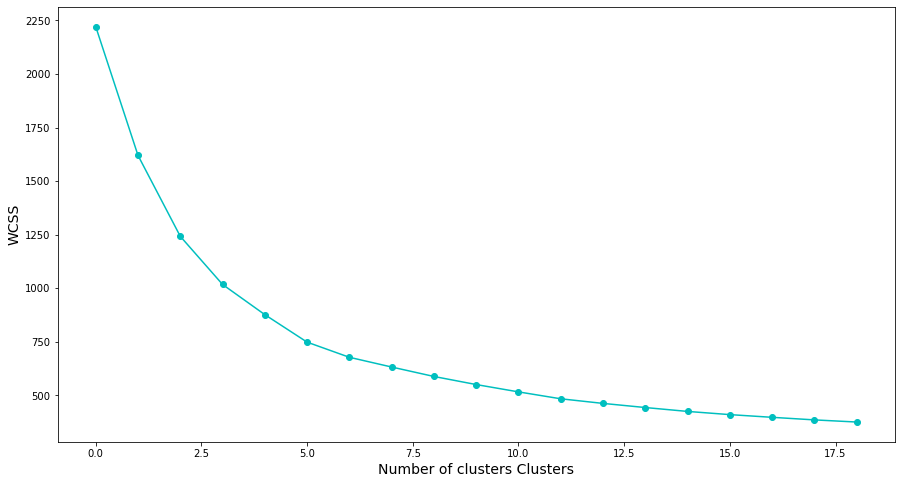

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8)) 
plt.plot(wcss, 'bo-', color='c')
plt.xlabel('Number of clusters Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14);

#### Using the elbow method it seems that the optimum number of clusters is between 3 and 5.

## 4 - Metric validation
### Implementing with KMeans, DBSCAN and Calinski Harabasz:

In [11]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [25]:
s0, dbs0, calinski0= clustering_algorithm(3, values)
print(s0, dbs0, calinski0)

0.3272203126696238 1.3096073640088435 3526.4405199082735


In [27]:
s1, dbs1, calinski1= clustering_algorithm(4, values)
print(s1, dbs1, calinski1)

0.34815956710229545 1.2219368163967856 3528.6693769095446


In [28]:
s2, dbs2, calinski2= clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3644412634503358 1.0757796849981525 3431.7895561503533


Let's look at the silhouette value for 3, 4 and 5 clusters: 0.32, 0.34 and 0.36. We can see that the silhouette metric is increasing, so we got a better result with 5 clusters. But we don't have a revelant difference in any of the metrics.

Another form of validation is to compare the values from a random database. The idea is that we can ensure that our dataset has better metrics, and therefore a structure capable of being clustered.

We will generate a random dataset, with values between 0 and 1. We will use the same amount of variables, that is, 16, and the same amount of instances.

The new dataset we will create will be called random_data.

In [29]:
import numpy as np
random_data = np.random.rand(8950,16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2,dbs2, calinski2)

0.04014722626220686 3.467535387249433 304.41662767609347
0.3644412634503358 1.0757796849981525 3431.7895561503533


We have a relevant difference between our original database and the random set, which is good for our validation.

For the random set the silhoutte score was 0.04 and for original 0.36. For baouldin we will have 3.5 and 1.07. For calinski we will have 300 and 3431, respectively.


## 5 - Validation of the cluster stability

The idea is to split the database in 3 and run kmeans for each of these parts in order to get similar results.

In [51]:
set1, set2, set3 = np.array_split(values, 3)
w1, dbs1, calinski1 = clustering_algorithm(5, set1)
w2, dbs2, calinski2 = clustering_algorithm(5, set2)
w3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.34815956710229545 1.0588202114905991 1204.064049138465
0.3644412634503358 1.1429408609552179 1194.9401425417568
0.3059352096599491 1.0988027839846313 1167.5299723518192


By having similar values in the three scores, this indicates that our cluster is valid. 

## 6 - Visualizing clusters
Now, we have to interpret the results of the clusters, our main goal.
Firstly, we have to find a way to visualize the cluster results: we have 16 features, thats means 16 dimensions. That is too many dimensions for one graph. So we can start looking into pairs of features. 

We will use pairplot from seaborn library:

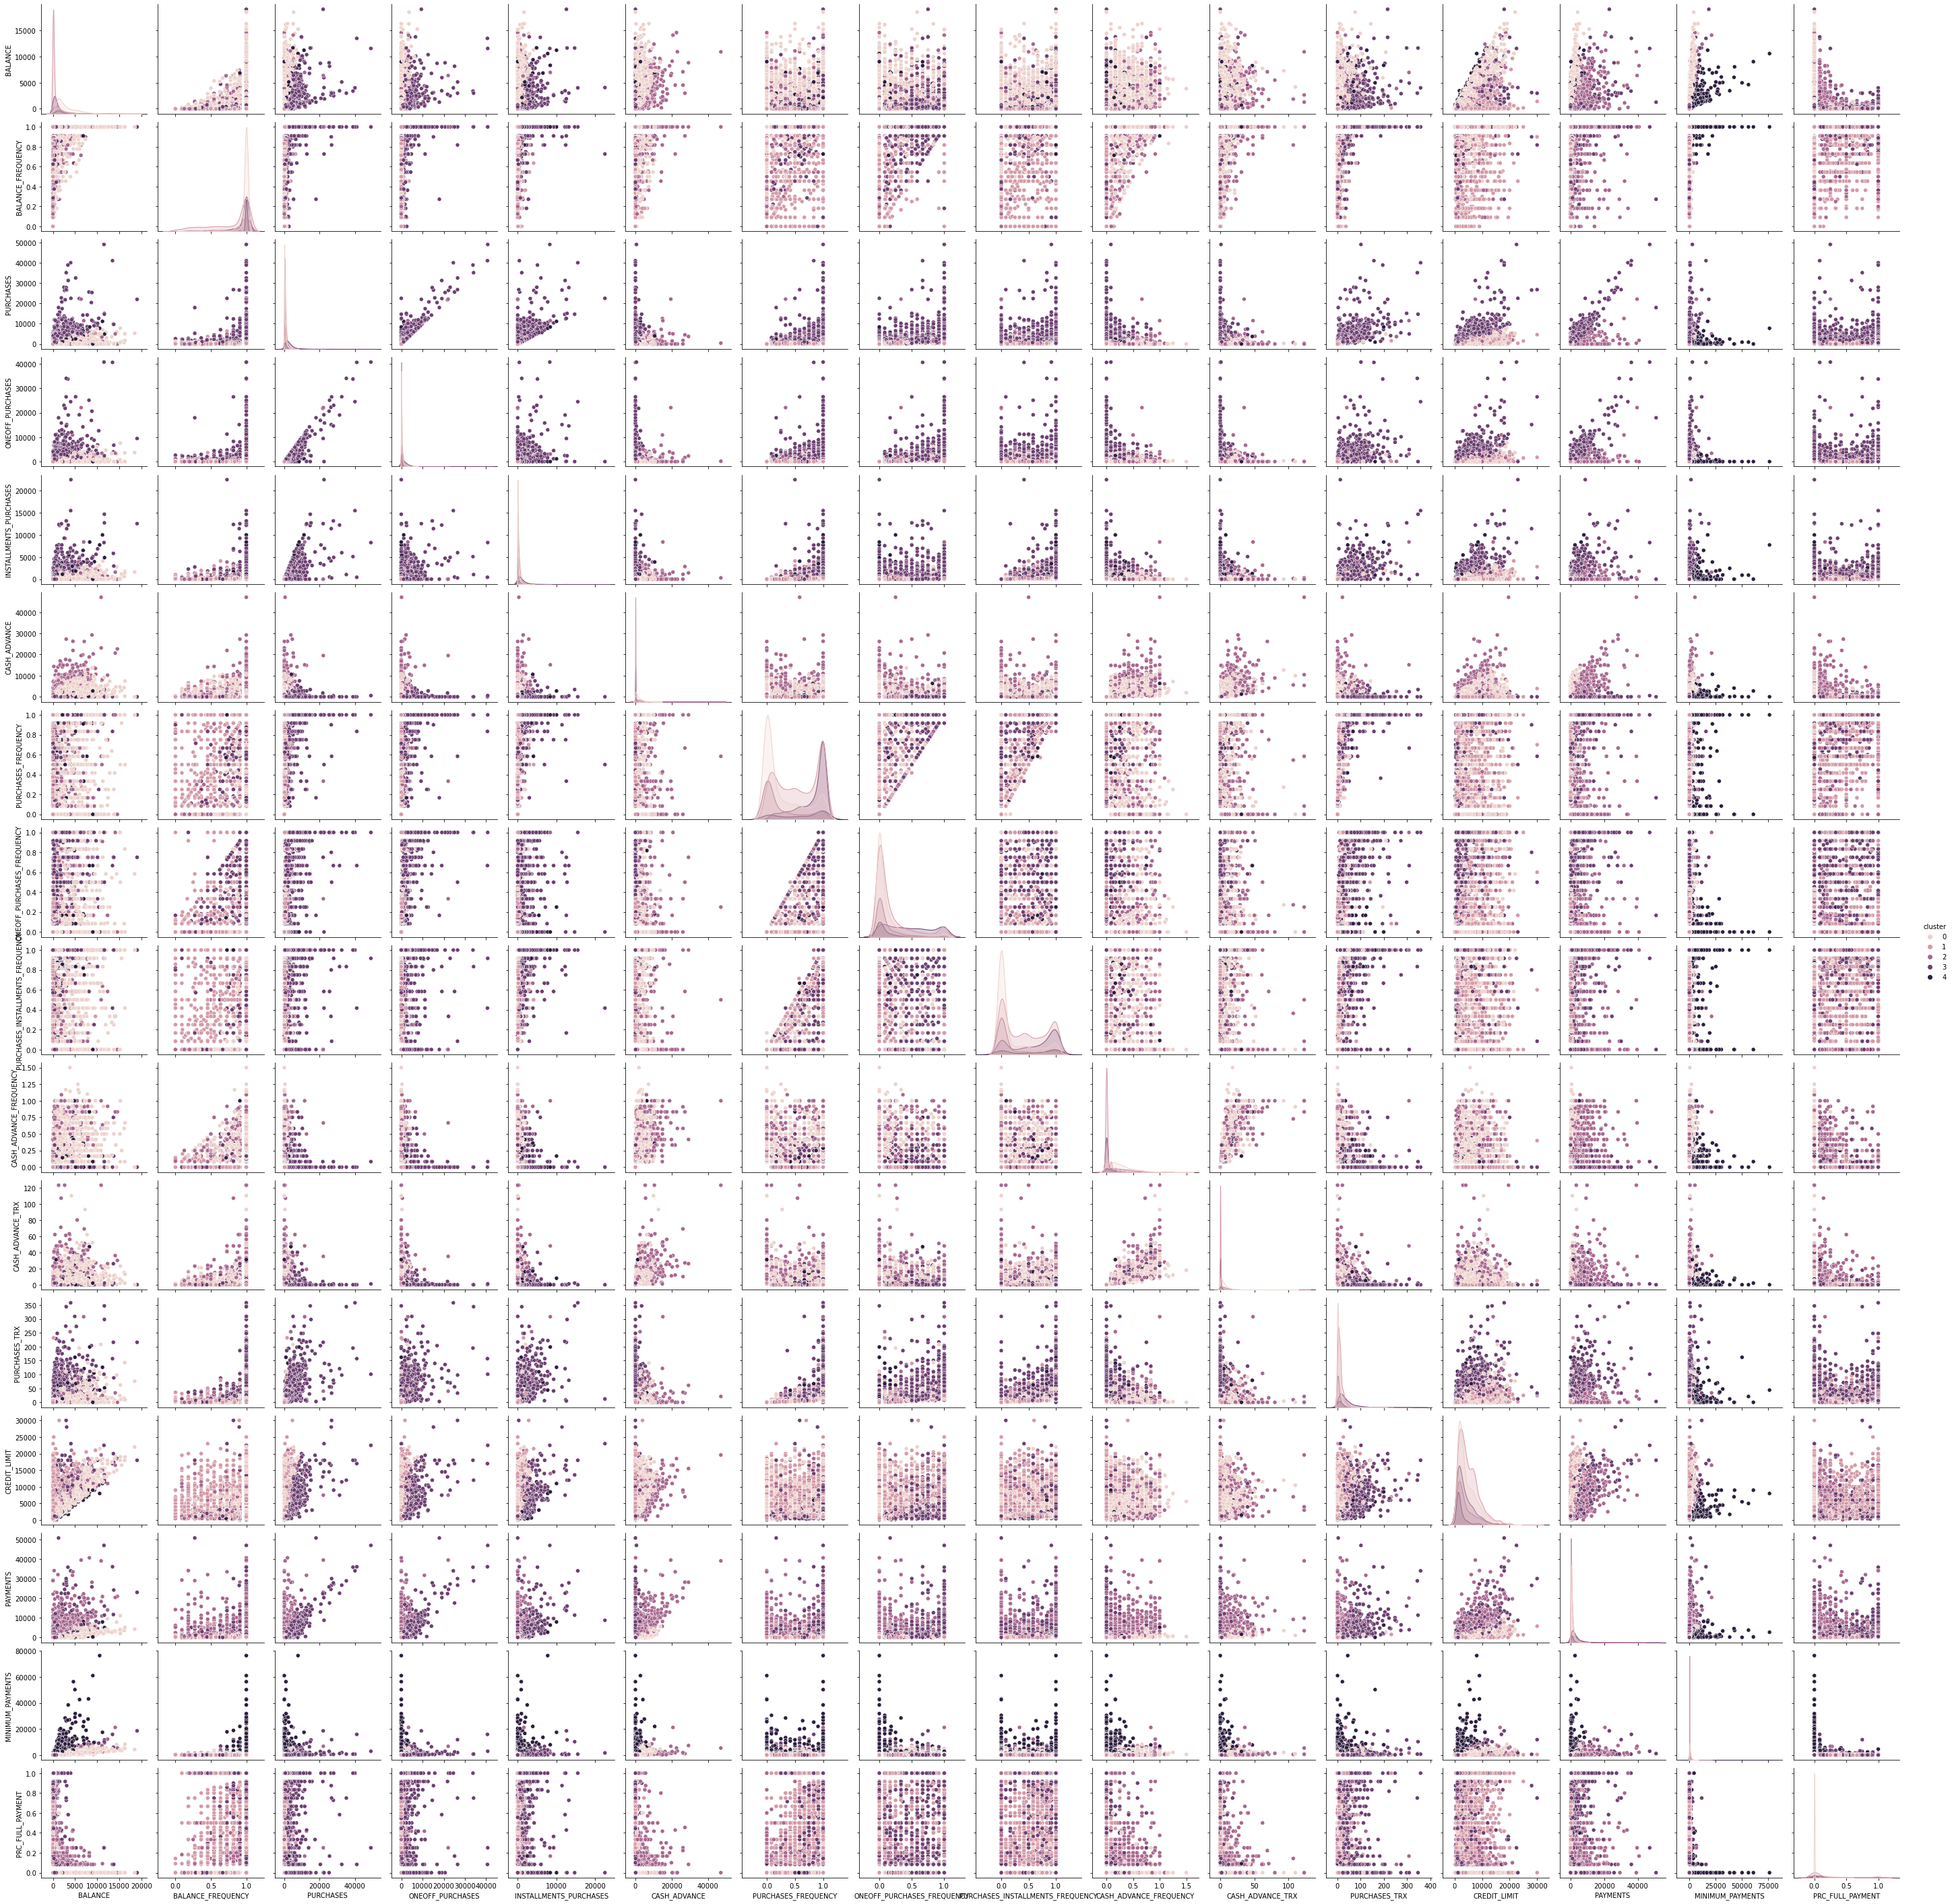

In [50]:
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

Once this is done we will have a large set of charts divided into pairs. There are 256 graphs and can hinder our process of validating information showing it that way.

### We can try a statistic way for the validation:

In [19]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        2650.0  3033.921852  2477.323151   6.824905  1254.527753   
1        3277.0   443.656562   846.766385   0.000000    23.290641   
2        1073.0  1795.328292  1982.485775   0.000000   507.076999   
3        1537.0  1146.549978  1674.369172   0.000000   212.282538   
4         413.0  1984.648113  1850.663367  70.794108  1016.583226   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        2172.596565  4223.606243  18495.558550            2650.0  0.963451   
1          82.803156   408.948673   9630.367575            3277.0  0.774427   
2        1088.056301  2315.003636  14581.459140            1073.0  0.862260   
3         555.131027  1370.317105  19043.138560            1537.0  0.928267   
4        1337.287314  2128.151695  11670.179850             413.0  0.989537   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      1330.332500   8345.641905           2650.0  0.001893   
1        ...       248.700571   4483.503862           3277.0  0.246955   
2        ...       884.183626  21235.065300           1073.0  0.117430   
3        ...       523.893953  18621.013310           1537.0  0.278150   
4        ...      7060.930982  76406.207520            413.0  0.019225   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.023750  0.0  0.0  0.000000  0.000000  0.6  
1        0.346854  0.0  0.0  0.000000  0.444444  1.0  
2        0.186772  0.0  0.0  0.083333  0.142857  1.0  
3        0.367086  0.0  0.0  0.083333  0.545455  1.0  
4        0.090690  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

##### I) Display the centroids variation of the cluster:

In [32]:
centroids = kmeans.cluster_centers_
print(centroids)

[[5.03777580e-01 2.72021535e-04 6.15122768e-02 3.61097486e-02
  2.54242413e-02 2.53443991e-01 6.71342853e-05 2.56651832e-05
  4.48774720e-05 5.75801843e-05 1.15875721e-03 1.32625377e-03
  7.19491963e-01 1.65990542e-01 1.78916846e-01 5.79879694e-07]
 [6.89300816e-02 2.30811563e-04 1.21599735e-01 4.79941134e-02
  7.37059724e-02 2.39233376e-02 1.73047229e-04 3.37047257e-05
  1.40479592e-04 7.81880085e-06 1.22590351e-04 2.86696433e-03
  9.43653614e-01 1.53825537e-01 5.68566809e-02 7.62200168e-05]
 [2.35130689e-01 2.16418717e-04 6.04525670e-02 3.44569238e-02
  2.60008529e-02 3.99755165e-01 5.26563547e-05 2.05235176e-05
  3.52245850e-05 6.54254245e-05 1.57052528e-03 1.12425758e-03
  5.35275552e-01 5.98057989e-01 1.04294158e-01 2.77348362e-05]
 [1.60284401e-01 2.45094130e-04 4.38450250e-01 2.57194030e-01
  1.81427842e-01 2.58559897e-02 2.04198542e-04 8.90200896e-05
  1.50430779e-04 9.38731157e-06 1.69791390e-04 6.17297243e-03
  6.04048764e-01 4.02347043e-01 8.53145047e-02 7.18989321e-05]
 [3.

We will observe the variance of the centroids among features, that is, we will check how each features behaves in the different clusters.
Those features that have the highest variance will be used.

##### II) Selecting the highest value FOR each feature :

In [44]:
max =len(centroids[0]) 
for i in range(max): 
    print(dataframe.columns.values[i], "\n{:.4f}".format (centroids[:, i].var())) 

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0226
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0359
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0540
PRC_FULL_PAYMENT 
0.0000


#### Selected features: 

- PURCHASES : Amount of purchases made from account
- CASHADVANCE : Cash in advance given by the user
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user

#### III) Check the mean values of each selected features and the number of clients by cluster:

In [47]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        3033.921852   383.091223   1638.016266   4492.905660   967.285328   
1         443.656562   629.666790    140.224216   5132.498251   814.594798   
2        1795.328292   476.810531   3267.199032   3982.452201  4713.384730   
3        1146.549978  3275.461776    183.376625   4103.357288  3037.801555   
4        1984.648113   857.314770    419.089985   2223.728814  1337.388369   

         n_clients  
cluster             
0             2650  
1             3277  
2             1073  
3             1537  
4              413  


<ipython-input-47-09694d8613d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


To find out more accurate payment data, we will use an attribute that was not selected previously. The "PRC_FULL_PAYMENT", which indicates the percentage of payment made by the customer and it can measure the default risk for each cluster.

In [49]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0        2650.0  0.001893  0.023750  0.0  0.0  0.000000  0.000000  0.6
1        3277.0  0.246955  0.346854  0.0  0.0  0.000000  0.444444  1.0
2        1073.0  0.117430  0.186772  0.0  0.0  0.083333  0.142857  1.0
3        1537.0  0.278150  0.367086  0.0  0.0  0.083333  0.545455  1.0
4         413.0  0.019225  0.090690  0.0  0.0  0.000000  0.000000  1.0

### The goal was to segment the customers in order to define a marketing strategy. Unfortunately the colors of the plots change when this kernel has to re-run - but here are some thoughts:

- Cluster 0: Small Spenders, has the largest Credit limit and has low risk of default. Appears to be the largest group of customers.

- Cluster 1: Big Spenders focused on taking the most cash advances and has the highest risk of default

- Cluster 2: Good Spenders and Goodpayments. Represents the groups with good financial health. 

- Cluster 3: Cash Advances 

- Cluster 4: Lowest credit limit, high risk of default and represents the smallest group of customers